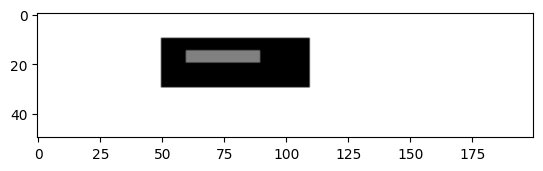

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

alto = 50
ancho = 200

mi_arreglo = np.zeros((alto,ancho))

mi_arreglo[10:30, 50:110] = 1

mi_arreglo[15:20, 60:90] = 0.5

plt.imshow(-mi_arreglo, cmap='gray')



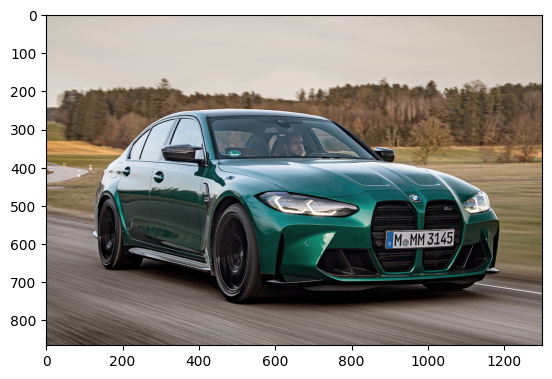

In [61]:
arch = 'M3.jpg'
img = plt.imread(arch)
plt.imshow(img)

In [62]:
type(img)

numpy.ndarray

In [63]:
img.shape

(866, 1300, 3)

In [64]:
img[175,250]

array([217, 208, 199], dtype=uint8)

In [65]:
img.max(), img.min()

(255, 0)

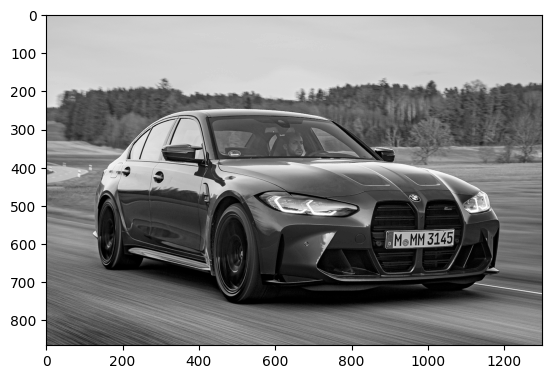

In [66]:
arch = 'M3.jpg'
img = cv2.imread(arch,0)
h,w = img.shape
plt.imshow(img,cmap='gray')


In [67]:
import keras

In [68]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
input_img = Input(shape=(h, w, 1))
type(input_img)

keras.src.backend.common.keras_tensor.KerasTensor

In [69]:
x = Conv2D(1, (1, 1), activation='relu', padding='same')(input_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


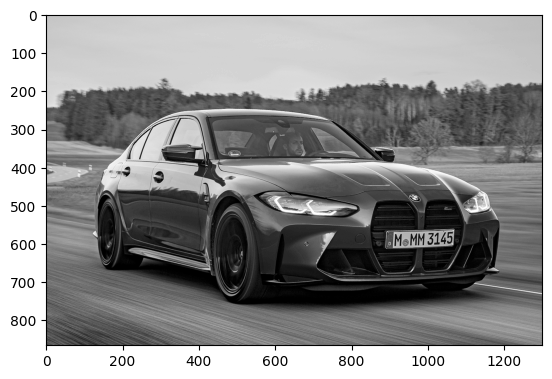

In [70]:
from keras.models import Model

modelo1 = Model(input_img, x)

modelo1.set_weights([np.array([[[[100.0]]]], dtype=np.float32), np.array([-50.0],dtype=np.float32)])

img1 = modelo1.predict(img.reshape(1,h,w,1))

img1.shape

plt.imshow(img1[0,:,:,0],cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


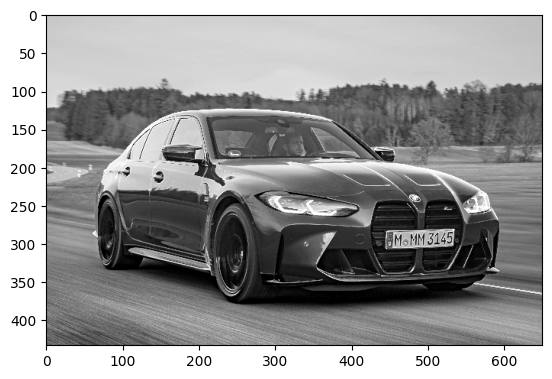

In [71]:
from keras.models import Model

x = Conv2D(1, (1, 1), activation='relu', padding='same')(input_img)

x = MaxPooling2D((2, 2), padding='same')(x)

modelo2 = Model(input_img, x)

modelo2.set_weights([np.array([[[[100.0]]]], dtype=np.float32), np.array([-50.0],dtype=np.float32)])

img2 = modelo2.predict(img.reshape(1,h,w,1))

img2.shape

plt.imshow(img2[0,:,:,0],cmap='gray')

In [72]:
from IPython.display import Image
import numpy as np
import time
import os
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model
import glob
import cv2
import json
from matplotlib import pyplot as plt
import keras



# rutina que imprime imágenes y algunas de sus características
# las imágenes son en escala de grises, flotante
def ver_imgs_gris(noms):
  global imgs
  n=len(noms)
  plt.clf()
  plt.figure(figsize=(6, n*5))
  #plt.figure()#figsize=(20, 4))
  for i in range(n):
      img=imgs[noms[i]]
      print(noms[i],img.shape,'min:',img.min(),'max:',img.max(),'esquina:',img[0,0,0,0])
      #h,w=imgs[i].shape
      ax = plt.subplot(n, 1, i+1)
      plt.imshow(-img[0,:,:,0])
#      plt.imshow(imgs[i].reshape(h, w))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      ax.set_title(noms[i])
  return plt.show()

def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida

arreglo 2 2 2 (2, 2, 1, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


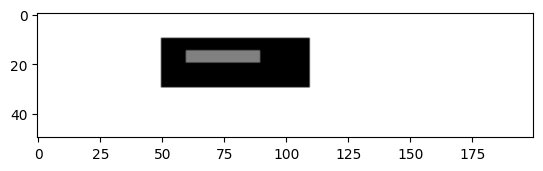

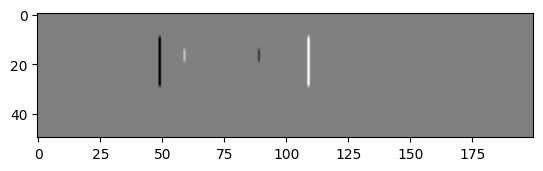

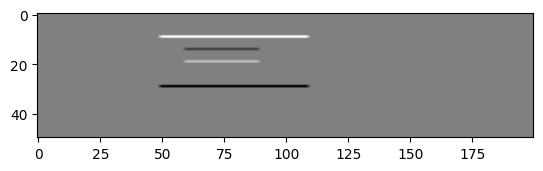

In [89]:
reformed_image = mi_arreglo.reshape(1,50,200,1)

# Define input layer with correct shape
input_layer = Input(shape=(50, 200, 1))

# Apply Conv2D to the input layer
x = Conv2D(2, (2, 2), activation='linear', padding='same')(input_layer)

# Create the model
modelo3 = Model(input_layer, x)


filtro1 = [[-1,1],
           [-1,1]]

filtro2 = [[1,1],
           [-1,-1]]

filtros = reformar_filtros([filtro1,filtro2])

modelo3.set_weights([filtros, np.array([0.0,0.0],dtype=np.float32)])

img_tmp4 = modelo3.predict(reformed_image)

im1 = np.reshape(img_tmp4[0,:,:,0],(50,200))
im2 = np.reshape(img_tmp4[0,:,:,1],(50,200))

plt.imshow(-mi_arreglo, cmap='gray')
plt.show()
plt.imshow(-im1,cmap='gray')
plt.show()
plt.imshow(-im2,cmap='gray')
plt.show()

arreglo 3 3 3 (3, 3, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


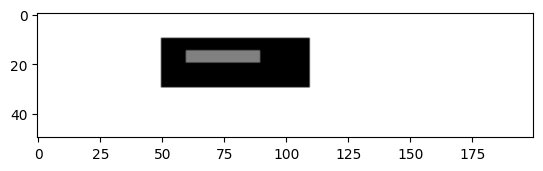

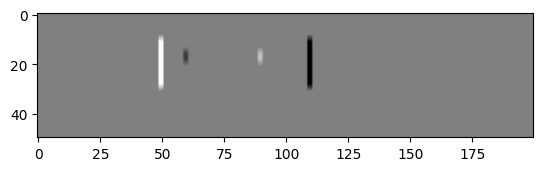

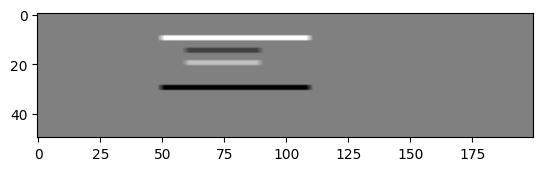

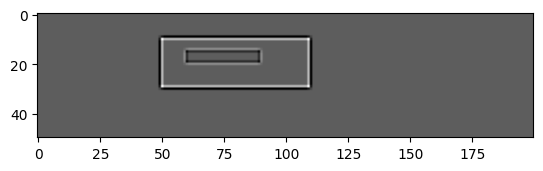

In [92]:
reformed_image = mi_arreglo.reshape(1,50,200,1)

# Define input layer with correct shape
input_layer = Input(shape=(50, 200, 1))

# Apply Conv2D to the input layer
x = Conv2D(3, (3, 3), activation='linear', padding='same')(input_layer)

# Create the model
modelo3 = Model(input_layer, x)

filtro1 = [[1,0,-1],
           [1,0,-1],
           [1,0,-1]]

filtro2 = [[1,1,1],
           [0,0,0],
           [-1,-1,-1]]

filtro3 = [[1,2,1],
           [2,-12,2],
           [1,2,1]]


filtros = reformar_filtros([filtro1,filtro2,filtro3])

modelo3.set_weights([filtros, np.array([0.0,0.0,0.0],dtype=np.float32)])

img_tmp4 = modelo3.predict(reformed_image)

im1 = np.reshape(img_tmp4[0,:,:,0],(50,200))
im2 = np.reshape(img_tmp4[0,:,:,1],(50,200))
im3 = np.reshape(img_tmp4[0,:,:,2],(50,200))


plt.imshow(-mi_arreglo, cmap='gray')
plt.show()
plt.imshow(-im1,cmap='gray')
plt.show()
plt.imshow(-im2,cmap='gray')
plt.show()


plt.imshow(-im3,cmap='gray')
plt.show()